In [1]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()

print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\A2


In [4]:
import landmarks_v2 as l2

In [5]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y

In [6]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [7]:
print (os.path.abspath(os.curdir))

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\A2


In [8]:
#self transpose
Y = np.array([y, -(y - 1)]).T 

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [9]:
print(tr_X)
print(tr_X.shape)
print(tr_Y)
print(tr_Y.shape)

[[[ 33 108]
  [ 34 122]
  [ 35 136]
  ...
  [ 97 158]
  [ 94 160]
  [ 89 160]]

 [[ 58 118]
  [ 58 127]
  [ 59 136]
  ...
  [ 88 158]
  [ 83 158]
  [ 79 157]]

 [[ 33 116]
  [ 34 129]
  [ 36 142]
  ...
  [ 96 153]
  [ 93 154]
  [ 88 153]]

 ...

 [[ 41 112]
  [ 41 124]
  [ 43 136]
  ...
  [ 96 157]
  [ 92 157]
  [ 87 157]]

 [[ 48 118]
  [ 48 129]
  [ 50 140]
  ...
  [ 93 151]
  [ 88 152]
  [ 84 152]]

 [[ 56 114]
  [ 55 124]
  [ 55 133]
  ...
  [ 90 158]
  [ 84 158]
  [ 80 157]]]
(3358, 68, 2)
[[ 0.  1.]
 [ 1. -0.]
 [ 0.  1.]
 ...
 [ 0.  1.]
 [ 0.  1.]
 [ 1. -0.]]
(3358, 2)


In [10]:
def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [11]:
print(tr_X.shape)

(3358, 136)


In [12]:
gamma='scale'

for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
                
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8590277777777777
0.1 1 Poly 0.8555555555555555
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8590277777777777
0.1 2 Poly 0.8840277777777777
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8590277777777777
0.1 3 Poly 0.8986111111111111
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8590277777777777
0.1 4 Poly 0.8958333333333334
1 Linear: 0.8972222222222223
1 scale Rbf: 0.8868055555555555
1 1 Poly 0.8805555555555555
1 Linear: 0.8972222222222223
1 scale Rbf: 0.8868055555555555
1 2 Poly 0.8965277777777778
1 Linear: 0.8972222222222223
1 scale Rbf: 0.8868055555555555
1 3 Poly 0.8993055555555556
1 Linear: 0.8972222222222223
1 scale Rbf: 0.8868055555555555
1 4 Poly 0.8986111111111111


In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as svc
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [14]:
# svc_list = []

# lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
# # print(C, "Linear:", lin_svc.score(te_X, te_Y))

# rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
# # print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

# poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
# # print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

# svc_list.append({
#     'lin_svc': lin_svc,
#     'rbf_svc': rbf_svc,
#     'poly_svc': poly_svc,
#     'C': C,
#     'gamma': gamma,
#     'degree': degree
# })

# #define model and performance measure
# svc_list=svc(probability=True, random_state=1)
# auc=make_scorer(roc_auc_score)

# #random search for 20 combinations of parameters
# rand_list = {"C":stats.uniform(2,10),
#             "gamma":stats.uniform(0.1,1),
#             "degree":stats.uniform(1,3)}

# rand_search = RandomizedSearchCV(svc_list, param_distributions = rand_list, n_iter=20, n_jobs=4, cv=3, random_state=2017, scoring=auc)
# rand_search.fit(tr_X, tr_Y)
# rand_search.cv_results_

# print(rand_search.best_params_)

In [15]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_
    
    print(searchrand.cv_results_)
    return searchrand.best_params_, searchrand.best_estimator_  

# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 23.1min finished


{'mean_fit_time': array([347.91030326,  41.95335937,  29.44429426, 358.47233763,
       121.37519264, 376.82296467, 150.13341694,  72.49119806,
       207.40002742, 333.95540996]), 'std_fit_time': array([34.54606897,  7.2765936 ,  4.35978326, 64.6764821 , 10.24423635,
       89.09659991, 19.41834598,  8.40946913, 39.18269616, 43.50330821]), 'mean_score_time': array([0.1484961 , 0.14454937, 0.16967015, 0.15180545, 0.15183644,
       0.14802899, 0.14789128, 0.16240568, 0.13159289, 0.14243903]), 'std_score_time': array([0.00842629, 0.0135385 , 0.02327662, 0.00552325, 0.00831729,
       0.00591438, 0.01528208, 0.01514732, 0.00892289, 0.00283716]), 'param_C': masked_array(data=[7.442707523445546, 1.1856118443168262,
                   0.750697554356483, 7.074123184677768,
                   2.7419803079221485, 7.777997278190772,
                   3.306357208165679, 1.80452239865997, 4.789949306354046,
                   8.950079728249063],
             mask=[False, False, False, False, Fal

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.3s finished


{'mean_fit_time': array([5.08177419, 5.65577407, 3.32637129, 5.51250405, 4.82590108,
       2.03957906, 5.71234541, 6.0856998 , 6.63112659, 2.29500599]), 'std_fit_time': array([0.13122011, 0.09332982, 0.52978903, 0.05286373, 0.12124731,
       0.04791355, 0.10950928, 0.37286033, 0.16846853, 0.41639878]), 'mean_score_time': array([0.81682339, 0.98309917, 0.49469967, 0.93877287, 0.61948986,
       0.28550057, 1.05077863, 1.28368206, 0.99648442, 0.28740587]), 'std_score_time': array([0.01761075, 0.02159933, 0.00782637, 0.03386266, 0.05932034,
       0.02118764, 0.09757551, 0.1221147 , 0.08711566, 0.04623049]), 'param_C': masked_array(data=[8.99991942471339, 9.811175578763528,
                   5.8869309449590705, 5.879555370199828,
                   4.812927222658808, 4.8919512092820945,
                   4.425270600678638, 7.697001774196003,
                   5.2364657540556365, 8.936866341782109],
             mask=[False, False, False, False, False, False, False, False,
           

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.8s finished


{'mean_fit_time': array([12.2802155 ,  1.87174339,  2.94069085,  1.48521671,  3.16174846,
        4.58321776,  1.8319427 , 10.3206882 ,  1.81650205,  1.6614748 ]), 'std_fit_time': array([0.88853569, 0.21139603, 0.42348101, 0.18592573, 0.18375885,
       0.17049342, 0.04289373, 0.38908814, 0.39578923, 0.17055741]), 'mean_score_time': array([0.1960248 , 0.2086514 , 0.16740985, 0.29502358, 0.52849522,
       0.79413967, 0.25900245, 0.148594  , 0.22370114, 0.16713405]), 'std_score_time': array([0.03215688, 0.01138356, 0.00663367, 0.05019297, 0.059423  ,
       0.03109556, 0.04625126, 0.00393826, 0.01916541, 0.01769479]), 'param_C': masked_array(data=[7.901480682831564, 3.2674994721068584,
                   1.3659868240019413, 10.09471305027303,
                   1.638636988519856, 0.37723715583811257,
                   4.6151899467158835, 7.215880206845042,
                   7.667004505118344, 6.355160261939672],
             mask=[False, False, False, False, False, False, False, False

In [16]:
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))

0.8972222222222223
0.8923611111111112
0.8986111111111111


In [17]:
import landmarks_v2_test as l1 

In [18]:
def get_data():
    return l1.extract_features_labels()

In [19]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [20]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

Automatically created module for IPython interactive environment


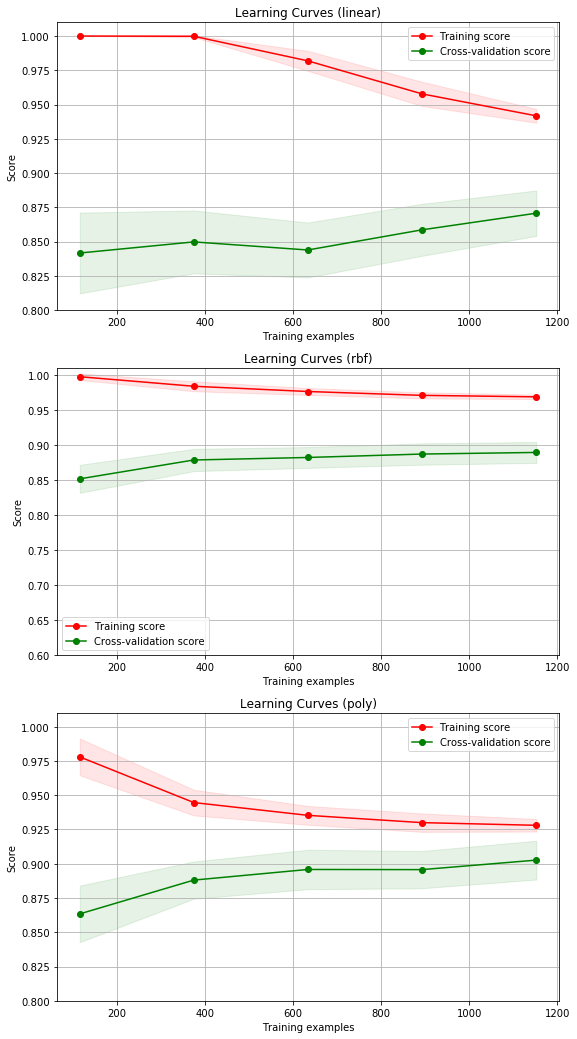

In [21]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

    return plt

plt.figure(figsize=(9,18))

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)


# estimator = poly_SVC 
# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
title = r"Learning Curves (linear)"
plot_learning_curve(lin_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(312)
title = r"Learning Curves (rbf)"
plot_learning_curve(rbf_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(313)
title = r"Learning Curves (poly)"
plot_learning_curve(poly_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)


plt.show()

In [27]:
def val_sc(x):
    score = x.score(te_X, te_Y)
    return score

def tr_sc(x):
    score = x.score(tr_X, tr_Y)
    return score

In [28]:
val_sc = val_sc(rbf_SVC)
val_sc

0.8923611111111112

In [29]:
tr_sc = tr_sc(rbf_SVC)
tr_sc

0.9568195354377605

[[421  52]
 [ 55 442]]

Confusion Matrix


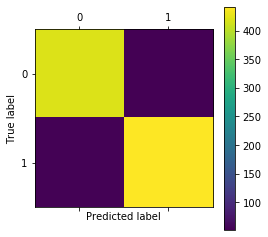

[[0.43402062 0.05360825]
 [0.05670103 0.4556701 ]]

Confusion Matrix(normalised)


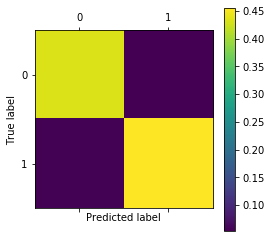

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       473
         1.0       0.89      0.89      0.89       497

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8896907216494845 ♡♡♡


In [30]:
# op_lin_results = optimised_lin.predict(te_X)
op_lin_results = lin_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_lin_results)
cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_lin_results, normalize='all')
cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[421  52]
 [ 57 440]]

Confusion Matrix


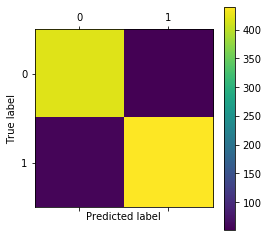

[[0.43402062 0.05360825]
 [0.05876289 0.45360825]]

Confusion Matrix(normalised)


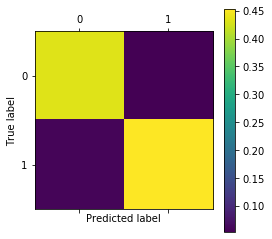

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       473
         1.0       0.89      0.89      0.89       497

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8876288659793814 ♡♡♡


In [23]:
# optimised_rbf = svm.SVC(kernel = 'rbf', gamma = rbfSVC_param['gamma'], C = rbfSVC_param['C'])
# optimised_rbf.fit(tr_X, tr_Y)
# op_rbf_results = optimised_rbf.predict(te_X)
op_rbf_results = rbf_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_rbf_results)
cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_rbf_results, normalize='all')
cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

[[424  49]
 [ 51 446]]

Confusion Matrix


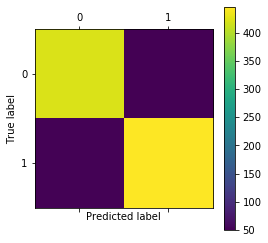

[[0.4371134  0.05051546]
 [0.05257732 0.45979381]]

Confusion Matrix(normalised)


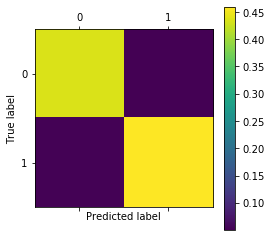

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       473
         1.0       0.90      0.90      0.90       497

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970

Accuracy achieved: 0.8969072164948454 ♡♡♡


In [24]:
# optimised_poly = svm.SVC(kernel = 'poly', degree = polySVC_param['degree'], C = polySVC_param['C'])
# optimised_poly.fit(tr_X, tr_Y)
# op_p_results = optimised_poly.predict(te_X)
op_p_results = poly_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_p_results)
cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_p_results, normalize='all')
cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

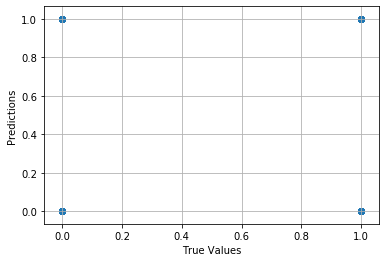

In [25]:
plt.scatter(te_B, op_p_results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

In [26]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 2250.2622718811035 seconds ---
